In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

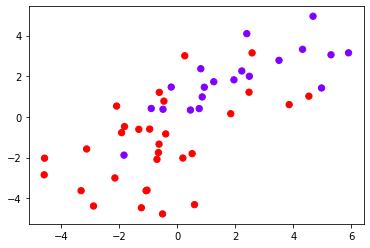

In [5]:
#Avarage values for each class  
m1 = np.array([-1,-1])
m2 = np.array([2,2])

#Covariance matrices
S1 = np.array([[4,2],[2,4]])
S2 = np.array([[4,2],[2,2]])

#Number of points in each class
n1 = 30
n2 = 20 

#Generating points from a normal distribution 
r1 = np.random.multivariate_normal(m1,S1,n1)
y1 = np.zeros(n1)

r2 = np.random.multivariate_normal(m2,S2,n2)
y2 = np.ones(n2)

r12 = np.concatenate((r1,r2))
y = np.hstack((y1, y2))  

plt.scatter(r12[:,0],r12[:,1], c=y, s=40, cmap="rainbow_r");

In [6]:
#Training classifier on all the data when training set is equal test set 
k_range = range(1,22)
scores = {} 
scores_list = []
#True positive and true negative tables for analysis of classifier
TN_list = []
TP_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(r12,y)
    y_pred=knn.predict(r12)
    scores[k]=metrics.accuracy_score(y,y_pred)
    scores_list.append(metrics.accuracy_score(y,y_pred))
    TP_list.append(confusion_matrix(y,y_pred)[0,0])
    TN_list.append(confusion_matrix(y,y_pred)[1,1]) 

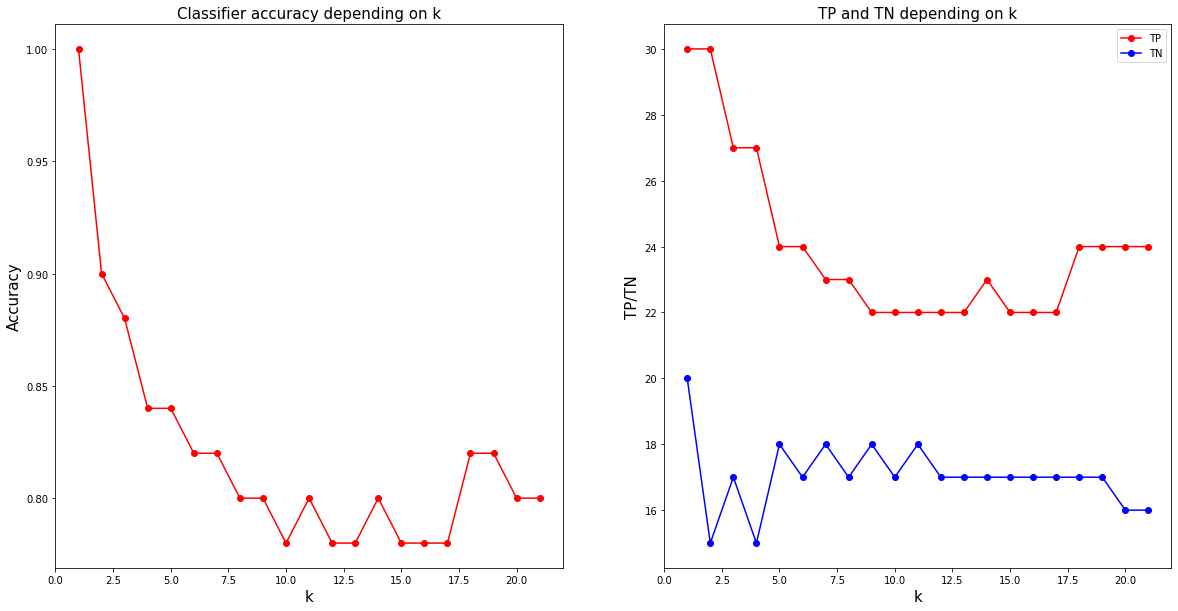

In [8]:
#Plotting results 
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(k_range,scores_list,linestyle='-',color = "red",
         marker = 'o',markerfacecolor='red',label = "Accuracy",)
ax1.set_title('Classifier accuracy depending on k', fontsize = 15)
ax1.set_xlabel('k', fontsize = 15)
ax1.set_ylabel('Accuracy', fontsize = 15)

ax2.plot(k_range,TP_list,linestyle='-',color = "red",
         marker = 'o',markerfacecolor='red',label = "TP",)
ax2.plot(k_range,TN_list,linestyle='-',color = "blue",
         marker = 'o',markerfacecolor='blue',label = "TN")
ax2.set_title('TP and TN depending on k', fontsize = 15)
ax2.set_xlabel('k', fontsize = 15)
ax2.set_ylabel('TP/TN', fontsize = 15)
ax2.legend()

plt.show()

Accuracy of classifier has the highest value for k = 1 (because class is chosen based on 1 nearest neighbour). the higher the k, the efficiency starts to decline. TP(True positive) in funcion of k shows how many elements from class 0 were classified as a class 0. TN(True negative) in function of k shows how many elements from class 1 were classified as a class 1. TP and TN values are strictly related to confusion matrix and this 2D problem is quite transparent to show the problem. 

In [9]:
#Drawing 10 points from class 0 and 5 points from class 1
X_test = np.r_[np.random.multivariate_normal(m1,S1,10), np.random.multivariate_normal(m2,S2,5)]

y_test = np.hstack((np.zeros(10),np.ones(5)))

k_range = range(1,22)
scores = {} 
scores_list = []
TN_list = []
TP_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(r12,y)
    y_pred=knn.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
    TP_list.append(confusion_matrix(y_test,y_pred)[0,0])
    TN_list.append(confusion_matrix(y_test,y_pred)[1,1]) 

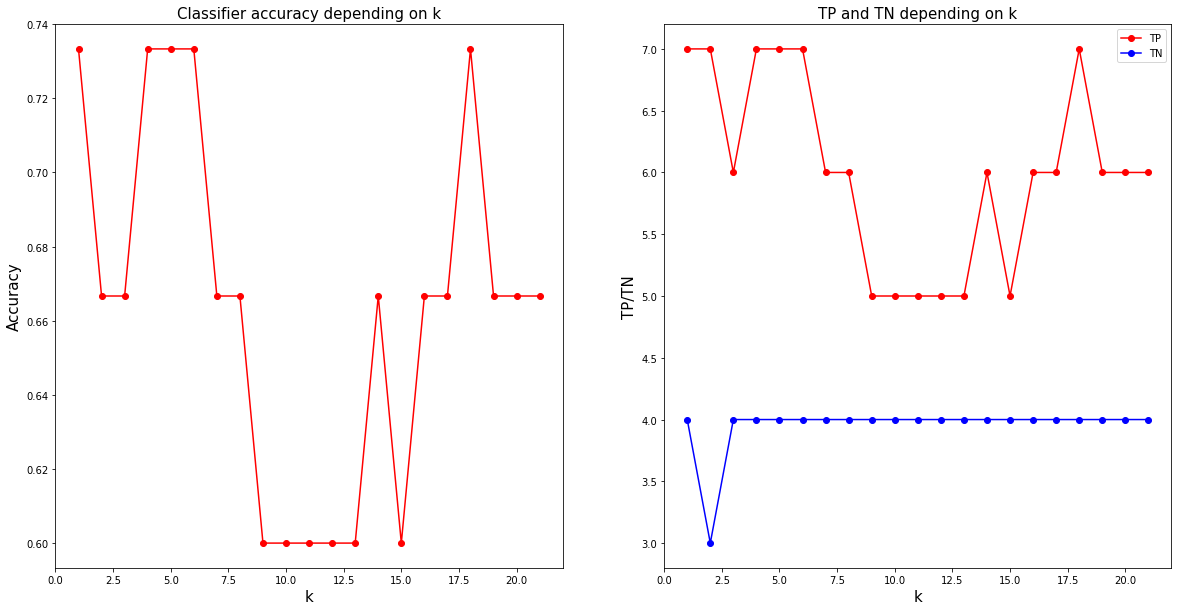

In [11]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(k_range,scores_list,linestyle='-',color = "red",
         marker = 'o',markerfacecolor='red',label = "Accuracy",)
ax1.set_title('Classifier accuracy depending on k', fontsize = 15)
ax1.set_xlabel('k', fontsize = 15)
ax1.set_ylabel('Accuracy', fontsize = 15)

ax2.plot(k_range,TP_list,linestyle='-',color = "red",
         marker = 'o',markerfacecolor='red',label = "TP",)
ax2.plot(k_range,TN_list,linestyle='-',color = "blue",
         marker = 'o',markerfacecolor='blue',label = "TN")
ax2.set_title('TP and TN depending on k', fontsize = 15)
ax2.set_xlabel('k', fontsize = 15)
ax2.set_ylabel('TP/TN', fontsize = 15)
ax2.legend()
plt.show()

Plots above show that due to selection of few points from the whole set we have just a part of information about neighbourhoods of points. Thanks to this fact we can see that there are some points that we cant easily classify. 